# Introduction

**Tentang Dataset**

Dataset diambil dari 'rumah123.com' yang berisi informasi tentang daftar properti didaerah Yogyakarta. dataset mencakup:
*   price (harga properti)
*   nav-link (tautan properti)
*   description (deskripsi properti)
*   listing-location (lokasi)
*   bed (jumlah kamar tidur)
*   bath (jumlah kamar mandi)
*   carport (jumlah slot kendaraan)
*   surface_area (luas tanah (m2))
*   building_area (luas rumah (m2))

Rumah123.com merupakan situs web untuk membeli dan menjual properti.

# Import Library dan Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../dataset/raw/yogyakarta.csv')

# Exploratory Data Analysis (EDA)

**Gambaran Umum Data**

In [3]:
df.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,"Rp 1,79 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²
1,Rp 170 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²
2,Rp 695 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²
3,Rp 560 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²
4,Rp 200 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²


**Melihat Struktur Data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2020 non-null   object 
 1   nav-link          2020 non-null   object 
 2   description       2020 non-null   object 
 3   listing-location  2020 non-null   object 
 4   bed               2001 non-null   float64
 5   bath              1999 non-null   float64
 6   carport           1713 non-null   float64
 7   surface_area      2019 non-null   object 
 8   building_area     2019 non-null   object 
dtypes: float64(3), object(6)
memory usage: 142.2+ KB


**Mengecek dan Menangani Missing Values**

In [5]:
df.isnull().sum()

price                 0
nav-link              0
description           0
listing-location      0
bed                  19
bath                 21
carport             307
surface_area          1
building_area         1
dtype: int64

In [6]:
# Menghapus baris yang memiliki nilai yang hilang
df = df.dropna(subset=['surface_area', 'building_area'])

df.shape

(2019, 9)

In [7]:
# Mengisi baris yang memiliki nilai yang hilang dengan nilai 0
df.fillna(0, inplace=True)
df.isnull().sum()

price               0
nav-link            0
description         0
listing-location    0
bed                 0
bath                0
carport             0
surface_area        0
building_area       0
dtype: int64

**Mengecek Duplikasi**

In [8]:
df.duplicated().sum()

0

In [9]:
df = df.drop(columns = ['nav-link', 'description'])

In [10]:
df.rename(columns={'listing-location': 'location'}, inplace=True)

In [11]:
import re

# Fungsi untuk mengonversi string harga ke nilai numerik
def convert_price(price_str):
    price_str = price_str.lower().replace(" ", "").replace(",", ".").replace('Rp ', '')
    if "juta" in price_str:
        price_num = float(re.sub("[^0-9.]", "", price_str))
        return price_num * 1e6  # 1 juta = 1.000.000
    elif "miliar" in price_str:
        price_num = float(re.sub("[^0-9.]", "", price_str))
        return price_num * 1e9  # 1 miliar = 1.000.000.000
    else:
        return float(re.sub("[^0-9.]", "", price_str))

# Konversi kolom price menggunakan fungsi convert_price
df['price'] = df['price'].apply(convert_price)
df

,price,location,bed,bath,carport,surface_area,building_area
0,1.790000e+09,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²
1,1.700000e+08,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²
2,6.950000e+08,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²
3,5.600000e+08,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²
4,2.000000e+08,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²
...,...,...,...,...,...,...,...
2015,5.000000e+08,"Kalasan, Sleman",3.0,2.0,2.0,104 m²,80 m²
2016,7.500000e+08,"Gamping, Sleman",2.0,1.0,1.0,89 m²,60 m²
2017,7.560000e+08,"Ngaglik, Sleman",2.0,1.0,2.0,140 m²,60 m²
2018,1.780000e+09,"Depok, Sleman",4.0,3.0,2.0,118 m²,160 m²


In [12]:
# Menerapkan ekspresi reguler untuk menghapus bagian teks dari nilai
df['surface_area'] = df['surface_area'].apply(lambda x: re.sub(r'\D', '', str(x)))
df['building_area'] = df['building_area'].apply(lambda x: re.sub(r'\D', '', str(x)))

In [13]:
# Menggunakan pd.to_numeric() untuk mengonversi kolom 'price' ke tipe data numerik
df['surface_area'] = pd.to_numeric(df['surface_area'], errors='coerce')
df['building_area'] = pd.to_numeric(df['building_area'], errors='coerce')

df

,price,location,bed,bath,carport,surface_area,building_area
0,1.790000e+09,"Ngaglik, Sleman",3.0,3.0,2.0,120,110
1,1.700000e+08,"Jombor, Sleman",3.0,2.0,1.0,102,126
2,6.950000e+08,"Berbah, Sleman",2.0,2.0,1.0,100,100
3,5.600000e+08,"Prambanan, Sleman",3.0,1.0,1.0,109,67
4,2.000000e+08,"Moyudan, Sleman",2.0,1.0,1.0,60,30
...,...,...,...,...,...,...,...
2015,5.000000e+08,"Kalasan, Sleman",3.0,2.0,2.0,104,80
2016,7.500000e+08,"Gamping, Sleman",2.0,1.0,1.0,89,60
2017,7.560000e+08,"Ngaglik, Sleman",2.0,1.0,2.0,140,60
2018,1.780000e+09,"Depok, Sleman",4.0,3.0,2.0,118,160


In [14]:
df.describe()

,price,bed,bath,carport,surface_area,building_area
count,2.019000e+03,2019.000000,2019.000000,2019.000000,2019.000000,2.019000e+03
mean,1.840824e+09,3.932640,2.912333,1.322932,185.711243,1.192893e+06
std,2.700446e+09,3.675033,3.512648,1.307417,250.696507,5.359390e+07
min,7.000000e+06,0.000000,0.000000,0.000000,4.000000,4.000000e+00
25%,6.450000e+08,2.000000,1.000000,1.000000,97.000000,6.000000e+01
50%,1.100000e+09,3.000000,2.000000,1.000000,120.000000,1.000000e+02
75%,2.135000e+09,4.000000,3.000000,2.000000,178.000000,1.650000e+02
max,4.210000e+10,49.000000,49.000000,15.000000,4222.000000,2.408150e+09


**Korelasi Antar Fitur**

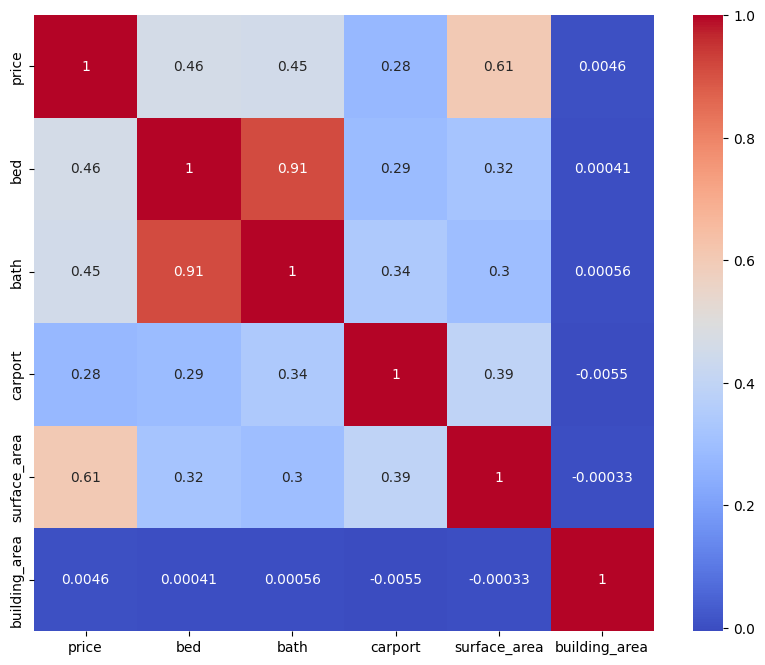

In [15]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

# Sistem Inforgmasi Geografis

In [16]:
# Menampilkan nilai unik dari kolom 'location'
unique_location = df['location'].unique()
print("Nilai unik dari kolom location:")
print(unique_location)

Nilai unik dari kolom location:
['Ngaglik, Sleman' 'Jombor, Sleman' 'Berbah, Sleman' 'Prambanan, Sleman'
 'Moyudan, Sleman' 'Depok, Sleman' 'Gamping, Sleman'
 'Kaliurang, Yogyakarta' 'Sedayu, Bantul' 'Ngemplak, Sleman'
 'Piyungan, Bantul' 'Umbulharjo, Yogyakarta' 'Godean, Sleman'
 'Mlati, Sleman' 'Condong Catur, Sleman' 'Kasihan, Bantul'
 'Bantul, Bantul' 'Sleman, Sleman' 'Sewon, Bantul' 'Kalasan, Sleman'
 'Plered, Bantul' 'Sleman, Yogyakarta' 'Maguwoharjo, Yogyakarta'
 'Demangan, Yogyakarta' 'Purwomartani   , Sleman' 'Minggir, Sleman'
 'Gondokusuman, Yogyakarta' 'Kotagede, Yogyakarta' 'Turi, Sleman'
 'Kaliurang, Sleman' 'Pogung, Yogyakarta' 'Mantrijeron, Yogyakarta'
 'Cebongan, Sleman' 'Pakualaman, Yogyakarta' 'Bantul, Yogyakarta'
 'Sayegan, Sleman' 'Danurejan, Yogyakarta' 'Wirobrajan, Yogyakarta'
 'Banguntapan, Bantul' 'Seturan, Yogyakarta' 'Pakem, Sleman'
 'Caturtunggal, Sleman' 'Tegalrejo, Yogyakarta' 'Wonosari, Gunung Kidul'
 'Jetis, Bantul' 'Pajangan, Bantul' 'Kraton, Yogyakarta'

In [17]:
location_counts = df['location'].value_counts()

# Menampilkan kategori yang paling banyak muncul
most_common_location = location_counts.idxmax()
most_common_count = location_counts.max()
top_5_locations = location_counts.head(5)

print("Lima kategori teratas dalam kolom 'location' adalah:")
print(top_5_locations)
print(f"Kategori paling banyak dalam kolom 'location' adalah '{most_common_location}' dengan jumlah {most_common_count} kali.")

Lima kategori teratas dalam kolom 'location' adalah:
location
Ngaglik, Sleman        303
Depok, Sleman          197
Kalasan, Sleman        144
Mlati, Sleman          122
Banguntapan, Bantul    117
Name: count, dtype: int64
Kategori paling banyak dalam kolom 'location' adalah 'Ngaglik, Sleman' dengan jumlah 303 kali.


# Simpan Data

In [18]:
from pathlib import Path

PREPROCESS_DIR = Path("../dataset/preprocessing")
PREPROCESS_DIR.mkdir(parents=True, exist_ok=True)

df.to_csv(
    PREPROCESS_DIR / "yogyakarta_clean.csv",
    index=False
)